In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error,classification_report

#train_df = pd.read_csv('data/train.csv')
train_df = pd.read_csv('train.csv')

train_df.info()

train_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713605 entries, 0 to 713604
Columns: 1584 entries, OBJECTID to FIPS_NAME_Zavala
dtypes: float64(8), int64(1561), object(15)
memory usage: 8.4+ GB


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIPS_NAME_Yellowstone,FIPS_NAME_Yoakum,FIPS_NAME_Yolo,FIPS_NAME_York,FIPS_NAME_Young,FIPS_NAME_Yuba,FIPS_NAME_Yukon-Koyukuk,FIPS_NAME_Yuma,FIPS_NAME_Zapata,FIPS_NAME_Zavala
254796,21164,21268,FS-1451805,FED,FS-FIRESTAT,FS,USCASQF,Sequoia National Forest,0513,Sequoia National Forest,...,0,0,0,0,0,0,0,0,0,0
680461,1382113,19077820,SFO-GA-FAN-9-2/13/1996-1400,NONFED,ST-GAGAS,ST/C&L,USGAGAS,Georgia Forestry Commission,GAGAS,Georgia Forestry Commission,...,0,0,0,0,0,0,0,0,0,0
76319,338404,346899,W-104011,FED,DOI-WFMI,BLM,USNMFAD,Farmington Field Office,NMFAD,Farmington Field Office,...,0,0,0,0,0,0,0,0,0,0
234201,1838212,300261049,SFO-2015KS00003493,NONFED,ST-NASF,ST/C&L,USKSKSS,Kansas State Forestry,KSKSS,Kansas State Forestry (PBC Area),...,0,0,0,0,0,0,0,0,0,0
96743,280326,285715,W-592858,FED,DOI-WFMI,BIA,USWACOA,Colville Agency,WACOA,Colville Agency,...,0,0,0,0,0,0,0,0,0,0
19155,1176280,1427412,MSHIST_24077,NONFED,ST-MSMSS,ST/C&L,USMSMSS,Mississippi Forestry Commission,MSMSS,Mississippi Forestry Commission,...,0,0,0,0,0,0,0,0,0,0
41790,1352473,1832309,SFO-NY-NY5268-2000-0050526,NONFED,ST-NASF,ST/C&L,USNYNYX,Fire Department of New York,NY5268,Fire Department of New York,...,0,0,0,0,0,0,0,0,0,0
311992,265075,270123,W-522574,FED,DOI-WFMI,BIA,USSDPRA,Pine Ridge Agency,SDPRA,Pine Ridge Agency,...,0,0,0,0,0,0,0,0,0,0
455899,215594,218724,W-92937,FED,DOI-WFMI,BLM,USCACND,Central California District,CABBD,Bakersfield District,...,0,0,0,0,0,0,0,0,0,0
132142,67910,68615,FS-293263,FED,FS-FIRESTAT,FS,USIDSCF,Salmon-Challis National Forest,0406,Challis National Forest,...,0,0,0,0,0,0,0,0,0,0


In [2]:
"""### Scaling Fire size"""

scaler = MinMaxScaler()
#train_df['FIRE_SIZE_SCALED'] = scaler.fit_transform(train_df[['FIRE_SIZE']])



In [3]:
"""### Selecting Important Columns"""

#good_cols = ["FIRE_YEAR","DISCOVERY_DOY","DISCOVERY_TIME","CONT_DOY","CONT_TIME","STAT_CAUSE_CODE",
#             "FIRE_SIZE_SCALED","LATITUDE","LONGITUDE","STATE","DISCOVERY_DATE"]

good_cols = ["FIRE_YEAR","DISCOVERY_DOY","CONT_DOY","CONT_TIME","STAT_CAUSE_CODE",
             "FIRE_SIZE","LATITUDE","LONGITUDE","STATE"]

#prefix1 = 'STAT_CAUSE_DESCR_'
#prefix2 = 'FIPS_NAME_'

# select the columns you want to keep
#keep_cols1 = train_df.filter(like=prefix1).columns.tolist()
#keep_cols2 = train_df.filter(like=prefix2).columns.tolist()
#keep_cols = good_cols + keep_cols1 + keep_cols2
keep_cols = good_cols #+ keep_cols2

df_interest = train_df[keep_cols]

print(df_interest.head())

#X = df_interest.drop(['STATE'], axis=1)
#y = df_interest['STATE']

#X.shape

#y.shape

X = df_interest.drop(["STATE"], axis=1)
X = scaler.fit_transform(X.to_numpy())
y = LabelEncoder().fit_transform(df_interest.STATE.values)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

print("--------------X after fit_transform using minmax scaler----------------------------")
pdX = pd.DataFrame(X)
print(pdX.head())

print("--------------y after fit_transform using LabelEncoder----------------------------")
pdy = pd.DataFrame(y)
print(pdy.head())

   FIRE_YEAR  DISCOVERY_DOY  CONT_DOY  CONT_TIME  STAT_CAUSE_CODE  FIRE_SIZE   
0       2012             71      71.0       1943              9.0        0.1  \
1       2012            225     225.0       1730              4.0        0.1   
2       2006            182     183.0       1500              1.0       98.6   
3       2010            192     192.0       1515              9.0        0.5   
4       2014             24      24.0       1439              5.0       11.8   

    LATITUDE   LONGITUDE STATE  
0  41.147000  -73.927000    NY  
1  43.084444 -122.617778    OR  
2  42.741900 -114.848900    ID  
3  40.293300 -111.977500    UT  
4  31.949458  -83.289372    GA  
Shape of X: (713605, 8)
Shape of y: (713605,)
--------------X after fit_transform using minmax scaler----------------------------
          0         1         2         3         4             5         6   
0  0.869565  0.191781  0.191781  0.823654  0.666667  1.645948e-07  0.442964  \
1  0.869565  0.613699  0.613699  

In [4]:
#print(X.sample(10))
print("------------------------------------------------------------")
#print(y.sample(10))

------------------------------------------------------------


In [5]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train model using LinearSVC
classifier = LinearSVC(random_state=0, tol=1e-05)
print(classifier)
classifier.fit(X_train, y_train)

# Evaluate the model
y_pred_train = classifier.predict(X_train)
y_pred_val = classifier.predict(X_val)

print("---------------------classification_report-----------------------------------------")
print(classification_report(y_val, y_pred_val))
# mse_train = mean_squared_error(y_train, y_pred_train)
# mse_val = mean_squared_error(y_val, y_pred_val)
# print("MSE on training set:", mse_train)
# print("MSE on validation set:", mse_val)

LinearSVC(random_state=0, tol=1e-05)
---------------------classification_report-----------------------------------------


C:\Users\mnsbh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mnsbh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       837
           1       0.03      0.02      0.02      3396
           2       0.00      0.00      0.00      1534
           3       0.57      0.83      0.67     10436
           4       0.75      1.00      0.86     14669
           5       0.46      0.29      0.36      4428
           6       0.00      0.00      0.00        28
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00         6
           9       0.81      0.73      0.77      3358
          10       0.47      0.93      0.63     15563
          11       0.00      0.00      0.00        33
          12       0.00      0.00      0.00        51
          13       0.14      0.11      0.12      4861
          14       0.00      0.00      0.00       278
          15       0.00      0.00      0.00       237
          16       0.38      0.33      0.35       945
          17       0.75    

C:\Users\mnsbh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("---------------------Confusion Matrix------------------------------------------")
cm = confusion_matrix(y_val, y_pred_val)
print(cm)

print("---------------------Score------------------------------------------")
# mean accuracy on the given test data and labels.
print(classifier.score(X_val,y_val))

print("---------------------f1_score-----------------------------------------")
print(f1_score(y_val,y_pred_val,average='macro')) 

print("---------------------accuracy_score-----------------------------------------")
print(accuracy_score(y_val,y_pred_val))

---------------------Confusion Matrix------------------------------------------
[[832   0   0 ...   0   0   0]
 [  0  54   0 ...   0   0   0]
 [  0 490   0 ...   0   0   0]
 ...
 [  0   0   0 ... 779   0   0]
 [  0   0   0 ...   0   8   0]
 [  0   0   0 ...   5   0   0]]
---------------------Score------------------------------------------
0.5116486011168644
---------------------f1_score-----------------------------------------
0.18402465460580644
---------------------accuracy_score-----------------------------------------
0.5116486011168644


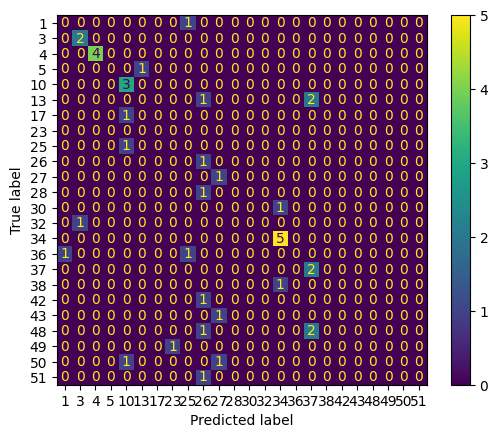

In [8]:
# plot the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_val[:40], y_pred_val[:40])
plt.show()

In [9]:
print(train_df.STATE.unique())

['NY' 'OR' 'ID' 'UT' 'GA' 'SC' 'ND' 'CA' 'RI' 'WI' 'CO' 'NM' 'KY' 'AZ'
 'WV' 'TN' 'WY' 'MT' 'NC' 'MN' 'MS' 'MI' 'NV' 'AL' 'OK' 'SD' 'KS' 'PA'
 'ME' 'WA' 'FL' 'MO' 'AR' 'IN' 'OH' 'TX' 'AK' 'NE' 'LA' 'NJ' 'IA' 'IL'
 'VA' 'MA' 'MD' 'DC' 'HI' 'NH' 'CT' 'PR' 'VT' 'DE']


In [10]:
print(y_val)

[17  1 50 ...  4 50 48]


In [11]:
print(y_pred_val)

[10 25 10 ...  4 10 26]


In [12]:
print(y_pred_val.shape)

(142721,)


In [13]:
unique_class_labels = pdy[0].unique()
print(sorted(unique_class_labels))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


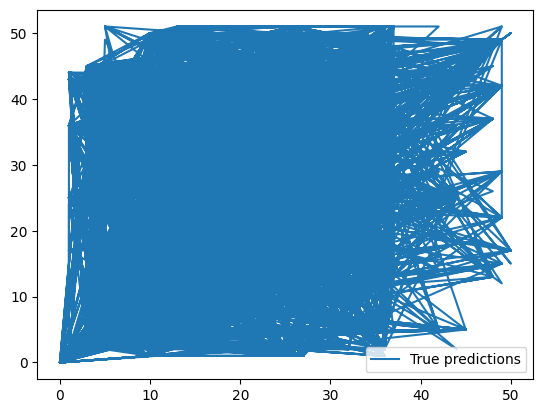

In [14]:
index = range(0,100)
plt.plot(y_pred_val[:10000], y_val[:10000], label = "True predictions")
#plt.plot(index, y_pred_val, label = "line 2")
plt.legend()
plt.show()

In [15]:
#df_interest["FIRE_YEAR"]
print(list(np.where(df_interest["FIRE_YEAR"] == 2012)))

NameError: name 'np' is not defined

In [ ]:
row_indices = list(np.where(df_interest["FIRE_YEAR"] == 2012))
print(type(row_indices))